<a href="https://colab.research.google.com/github/RosaR02/Car-and-Adult-Income/blob/main/adult_income_dataset_pt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Adult Income Dataset

1. Source of data- Kaggle

2. Brief description of data- The data describes the features related to adult incomes.

3. What is the target? Income

4. What does one row represent? (A person? A business? An event? A product?) A person

5. Is this a classification or regression problem? A Regression

6. How many features does the data have? 19

7. How many rows are in the dataset? 1000

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? I don't see any at the moment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split


In [ ]:
# Import necessary libraries

from sklearn.preprocessing import LabelEncoder

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as smote_pipe
from imblearn.over_sampling import SMOTE

import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_auc_score, RocCurveDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

from sklearn import metrics


In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

##Loading the data

In [ ]:
df = pd.read_csv("/content/archive.zip")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


##Cleaning the data

In [ ]:
# Check for duplicates
df.duplicated().sum()

52

In [ ]:
## Drop duplicate rows
df.drop_duplicates(inplace=True)


In [ ]:
#double checking
df.duplicated().sum()

0

In [ ]:
df.drop(columns=["fnlwgt"], inplace=True) # Dropping these columns in this line of code because they have no analytical value
df.drop(columns=["educational-num"], inplace=True)
df.drop(columns=["capital-gain"], inplace=True)
df.drop(columns=["capital-loss"], inplace=True)
df.drop(columns=["relationship"], inplace=True)
df.head(10)

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,White,Female,30,United-States,<=50K
5,34,Private,10th,Never-married,Other-service,White,Male,30,United-States,<=50K
6,29,?,HS-grad,Never-married,?,Black,Male,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,White,Male,32,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,White,Female,40,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,White,Male,10,United-States,<=50K


##Identify and address missing values

In [ ]:
df.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   education       48790 non-null  object
 3   marital-status  48790 non-null  object
 4   occupation      48790 non-null  object
 5   race            48790 non-null  object
 6   gender          48790 non-null  object
 7   hours-per-week  48790 non-null  int64 
 8   native-country  48790 non-null  object
 9   income          48790 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.1+ MB


In [ ]:
df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [ ]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [ ]:
df["education"] = df["education"].replace("9th","HS")
df["education"] = df["education"].replace("10th","HS")
df["education"] = df["education"].replace("11th","HS")
df["education"] = df["education"].replace("12th","HS")
df["education"] = df["education"].replace("1st-4th","ELEM")
df["education"] = df["education"].replace("5th-6th","ELEM")
df["education"] = df["education"].replace("7th-8th","MIDDLE")

In [ ]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
HS               4612
Masters          2656
Assoc-voc        2060
Assoc-acdm       1601
MIDDLE            954
Prof-school       834
ELEM              752
Doctorate         594
Preschool          81
Name: education, dtype: int64

In [ ]:
df.drop(df[df['education'] == 'Preschool'].index, inplace = True)
df.drop(df[df['education'] == 'MIDDLE'].index, inplace = True)
df.drop(df[df['education'] == 'ELEM'].index, inplace = True)

In [ ]:
df['occupation'].value_counts()

Prof-specialty       6145
Exec-managerial      6041
Craft-repair         5826
Adm-clerical         5569
Sales                5434
Other-service        4595
Machine-op-inspct    2745
?                    2625
Transport-moving     2216
Handlers-cleaners    1916
Tech-support         1438
Farming-fishing      1280
Protective-serv       969
Priv-house-serv       189
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
df["occupation"] = df["occupation"].replace("?","Other")
df["occupation"].value_counts()

Prof-specialty       6145
Exec-managerial      6041
Craft-repair         5826
Adm-clerical         5569
Sales                5434
Other-service        4595
Machine-op-inspct    2745
Other                2625
Transport-moving     2216
Handlers-cleaners    1916
Tech-support         1438
Farming-fishing      1280
Protective-serv       969
Priv-house-serv       189
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47003 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47003 non-null  int64 
 1   workclass       47003 non-null  object
 2   education       47003 non-null  object
 3   marital-status  47003 non-null  object
 4   occupation      47003 non-null  object
 5   race            47003 non-null  object
 6   gender          47003 non-null  object
 7   hours-per-week  47003 non-null  int64 
 8   native-country  47003 non-null  object
 9   income          47003 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df['workclass'].value_counts()

Private             32568
Self-emp-not-inc     3669
Local-gov            3074
?                    2616
State-gov            1958
Self-emp-inc         1664
Federal-gov          1426
Without-pay            19
Never-worked            9
Name: workclass, dtype: int64

In [ ]:
df["workclass"] = df["workclass"].replace("?","Other")
df["workclass"].value_counts()

Private             32568
Self-emp-not-inc     3669
Local-gov            3074
Other                2616
State-gov            1958
Self-emp-inc         1664
Federal-gov          1426
Without-pay            19
Never-worked            9
Name: workclass, dtype: int64

In [ ]:
df.drop(df[df['workclass'] == 'Without-pay'].index, inplace = True)
df.drop(df[df['workclass'] == 'Never-worked'].index, inplace = True)

In [ ]:
df['workclass'].value_counts()

Private             32568
Self-emp-not-inc     3669
Local-gov            3074
Other                2616
State-gov            1958
Self-emp-inc         1664
Federal-gov          1426
Name: workclass, dtype: int64

In [ ]:
df['native-country'].value_counts()

United-States                 42779
?                               805
Mexico                          518
Philippines                     273
Germany                         204
Canada                          176
Puerto-Rico                     157
India                           150
England                         125
Cuba                            118
South                           113
China                           112
Jamaica                         103
El-Salvador                     100
Japan                            91
Italy                            82
Poland                           81
Vietnam                          79
Columbia                         79
Dominican-Republic               74
Taiwan                           65
Haiti                            65
Iran                             59
Guatemala                        54
Portugal                         46
Greece                           45
Peru                             44
Nicaragua                   

In [ ]:
df["native-country"] = df["native-country"].replace("?","Other")
df["native-country"].value_counts()

United-States                 42779
Other                           805
Mexico                          518
Philippines                     273
Germany                         204
Canada                          176
Puerto-Rico                     157
India                           150
England                         125
Cuba                            118
South                           113
China                           112
Jamaica                         103
El-Salvador                     100
Japan                            91
Italy                            82
Poland                           81
Vietnam                          79
Columbia                         79
Dominican-Republic               74
Taiwan                           65
Haiti                            65
Iran                             59
Guatemala                        54
Portugal                         46
Greece                           45
Peru                             44
Nicaragua                   

In [ ]:
df.drop(df[df['native-country'] == 'Holand-Netherlands'].index, inplace = True)

In [ ]:
df['native-country'].value_counts()

United-States                 42779
Other                           805
Mexico                          518
Philippines                     273
Germany                         204
Canada                          176
Puerto-Rico                     157
India                           150
England                         125
Cuba                            118
South                           113
China                           112
Jamaica                         103
El-Salvador                     100
Japan                            91
Italy                            82
Poland                           81
Columbia                         79
Vietnam                          79
Dominican-Republic               74
Taiwan                           65
Haiti                            65
Iran                             59
Guatemala                        54
Portugal                         46
Greece                           45
Peru                             44
Nicaragua                   

In [ ]:
df['age'].value_counts()

36    1314
35    1313
33    1294
23    1290
34    1282
      ... 
85       5
88       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

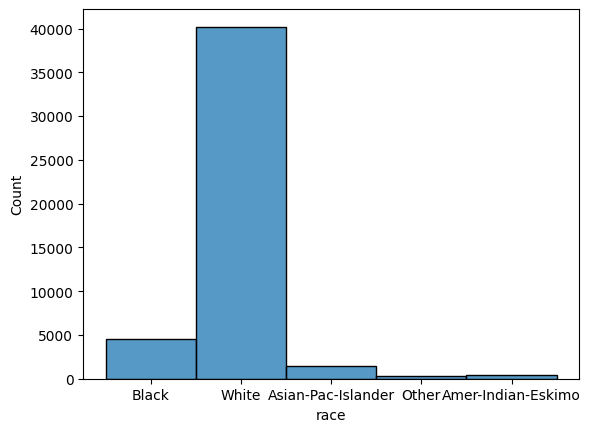

In [ ]:
sns.histplot(x="race", data=df); # This line of code provides a univariate visual for this value

The majority of employees are white compared to any other race.

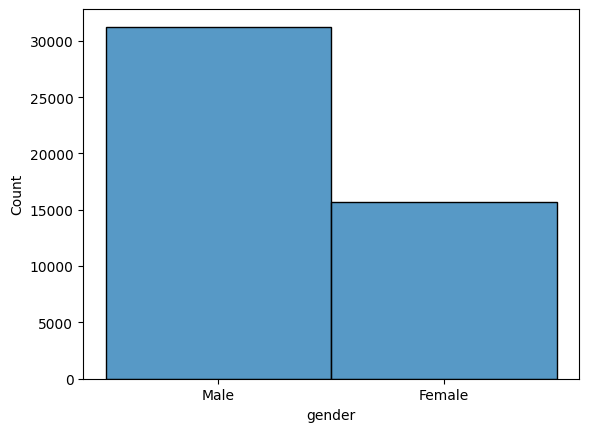

In [ ]:
sns.histplot(x="gender", data=df); # This line of code provides a univariate visual for this value

More than half of employees are males.

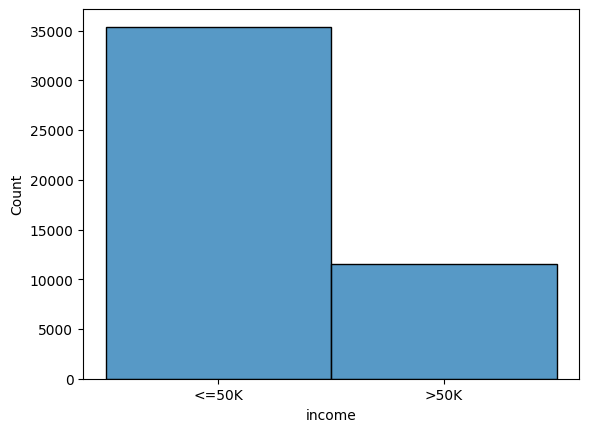

In [ ]:
sns.histplot(x="income", data=df); # This line of code provides a univariate visual for this value

The majority of the working class makes less than 50k. Roughly 12k people make over 50K.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Self-emp-not-inc'),
  Text(4, 0, 'Federal-gov'),
  Text(5, 0, 'State-gov'),
  Text(6, 0, 'Self-emp-inc')])

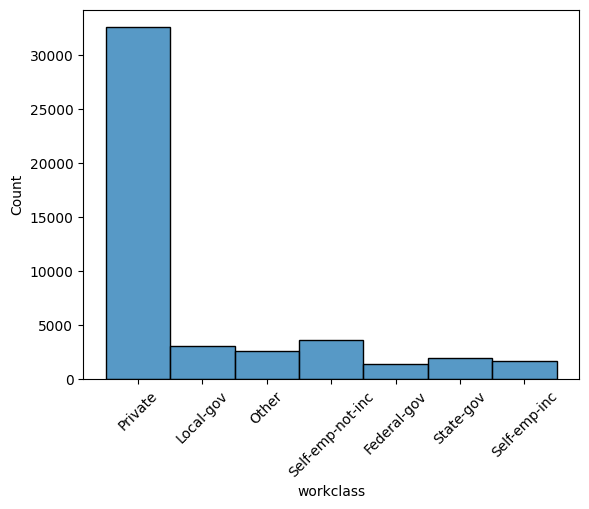

In [ ]:
sns.histplot(x="workclass", data=df); # This line of code provides a univariate visual for this value
plt.xticks(rotation=45)

##Identify Inconsistencies in Categorical Values

In [ ]:
#Create df copies in order to keep original data (df) intact
eda_df = df.copy()
ml_df = df.copy()


In [ ]:
#Iterate through categorical columns to print values to determine if inconsistencies are present.
cat_cols = [columns for columns in eda_df.columns if eda_df[columns].dtype=='object']

for col in cat_cols:
   print(f'{col}:')
   print(eda_df[col].value_counts())
   print('\n')
#print(cat_cols)

workclass:
Private             32567
Self-emp-not-inc     3669
Local-gov            3074
Other                2616
State-gov            1958
Self-emp-inc         1664
Federal-gov          1426
Name: workclass, dtype: int64


education:
HS-grad         15754
Some-college    10857
Bachelors        8013
HS               4607
Masters          2656
Assoc-voc        2060
Assoc-acdm       1599
Prof-school       834
Doctorate         594
Name: education, dtype: int64


marital-status:
Married-civ-spouse       21387
Never-married            15700
Divorced                  6479
Separated                 1445
Widowed                   1371
Married-spouse-absent      555
Married-AF-spouse           37
Name: marital-status, dtype: int64


occupation:
Prof-specialty       6145
Exec-managerial      6040
Craft-repair         5825
Adm-clerical         5566
Sales                5433
Other-service        4593
Machine-op-inspct    2742
Other                2616
Transport-moving     2215
Handlers-cleaners 

* No major inconsistencies present in categorical data

##Correlation Heatmap

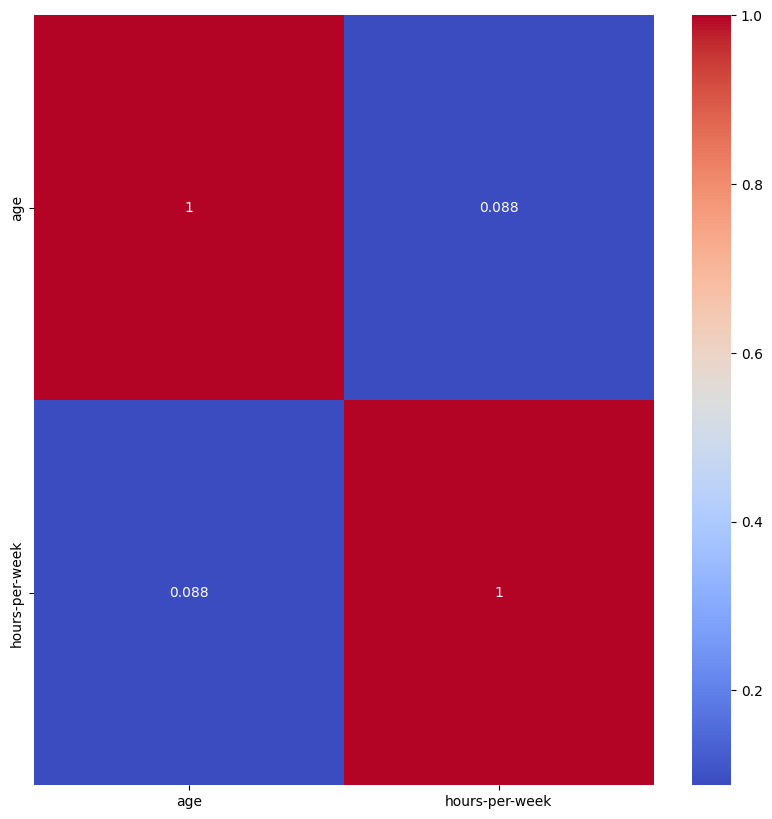

In [ ]:
corr = df.corr(numeric_only = True)
corr.round(2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

##Visualizations

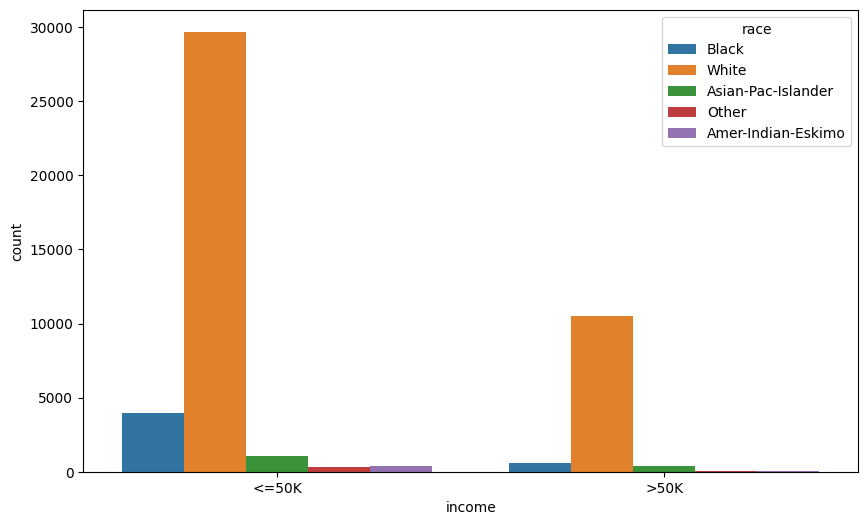

<Figure size 640x480 with 0 Axes>

In [ ]:

# sns.scatterplot(data=df, x="income", y="race", hue="race")
fig,ax = plt.subplots(figsize=(10,6))
#
sns.countplot(data=df, x="income", hue="race")
plt.setp(ax.get_xticklabels(), rotation = 0)
# display plots
plt.show()
plt.tight_layout();

This visualization shows the white race as the majority making 50k or less equally the same race makes 50k or more compared to other races. Virutally zero Others and Amer-Indian-Eskimo make 50k or more.

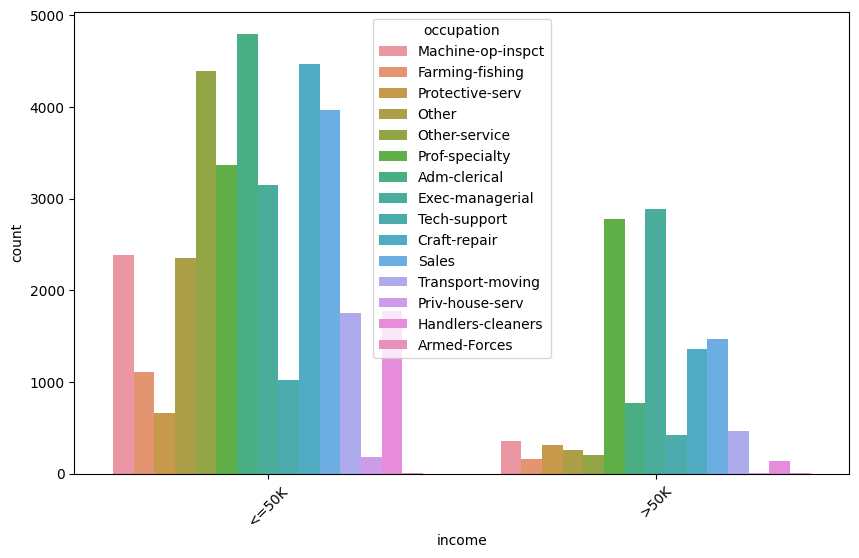

<Figure size 640x480 with 0 Axes>

In [ ]:
# sns.scatterplot(data=df, x="education", y="race", hue="race")
fig,ax = plt.subplots(figsize=(10,6))
#
sns.countplot(data=df, x="income", hue="occupation")
plt.setp(ax.get_xticklabels(), rotation = 45)
# display plots
plt.show()
plt.tight_layout();

Correlation between occupation and income.

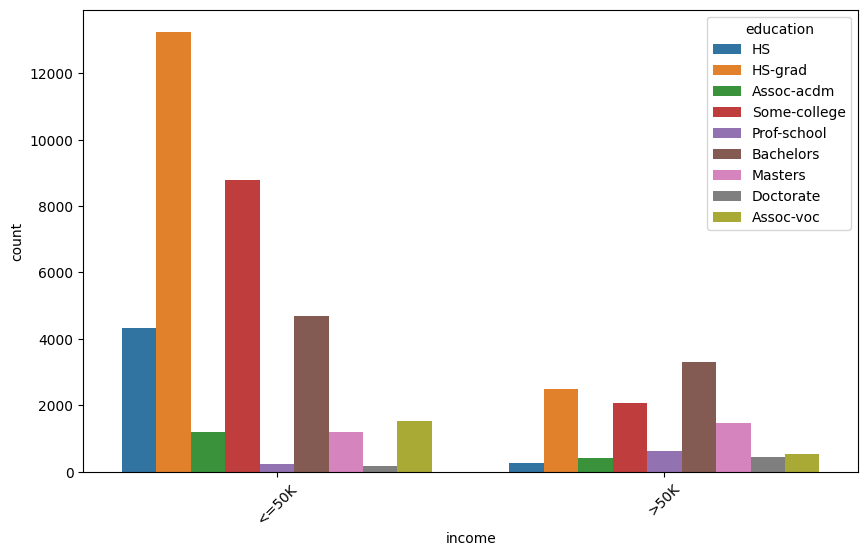

<Figure size 640x480 with 0 Axes>

In [ ]:

# sns.scatterplot(data=df, x="education", y="race", hue="race")
fig,ax = plt.subplots(figsize=(10,6))
#
sns.countplot(data=df, x="income", hue="education")
plt.setp(ax.get_xticklabels(), rotation = 45)
# display plots
plt.show()
plt.tight_layout();

Here you can see a clear correlation between income and eduation. Very few people with a high school education (not grad) can still make over 50k.

##Preprocessing

In [ ]:
#Copy ml_df for feature engineering later on.
ml2_df = ml_df.copy()

In [ ]:
ml_df.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,HS,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,Other,Some-college,Never-married,Other,White,Female,30,United-States,<=50K


In [ ]:
#Display the balance of income
ml_df['income'].value_counts(normalize = True)

<=50K    0.753459
>50K     0.246541
Name: income, dtype: float64

In [ ]:
ml_df["income"] = ml_df["income"].replace({"<=50K":0,">50K":1})
ml_df["income"].value_counts()

0    35393
1    11581
Name: income, dtype: int64

In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46974 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46974 non-null  int64 
 1   workclass       46974 non-null  object
 2   education       46974 non-null  object
 3   marital-status  46974 non-null  object
 4   occupation      46974 non-null  object
 5   race            46974 non-null  object
 6   gender          46974 non-null  object
 7   hours-per-week  46974 non-null  int64 
 8   native-country  46974 non-null  object
 9   income          46974 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.9+ MB


In [ ]:
#Change the int64 nominal columns to objects
ml_df['age'] = ml_df['age'].astype(str)
ml_df['hours-per-week'] = ml_df['hours-per-week'].astype(str)

In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46974 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46974 non-null  object
 1   workclass       46974 non-null  object
 2   education       46974 non-null  object
 3   marital-status  46974 non-null  object
 4   occupation      46974 non-null  object
 5   race            46974 non-null  object
 6   gender          46974 non-null  object
 7   hours-per-week  46974 non-null  object
 8   native-country  46974 non-null  object
 9   income          46974 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


##Validation split

In [ ]:
#Train test split validation
X = ml_df.drop(columns = ['income'])
y = ml_df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

##column selector

In [ ]:
#Create column selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

##Instantiate Transformers

In [ ]:
#Instantiate transformers that will be used in pipelines.
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

##Create Pipelines/ColumnTransformer

In [ ]:
#Create the numeric pipeline
num_pipe = make_pipeline(median_imputer, scaler)
num_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
#Create tuples for make_column_transformer
num_tup = (num_pipe, num_selector)
cat_tup = (ohe, cat_selector)

#Create variable preprocessor that contains all pipelines and transformers.
#preprocessor = make_column_transformer(num_tup, cat_tup, remainder = 'passthrough')
#preprocessor

preprocessor = make_column_transformer(num_tup,
                                       cat_tup,
                                       remainder='passthrough',
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8eea1d0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8ee9ae0>)],
                  verbose_feature_names_out=False)

##Review the preprocessed results

In [ ]:
# Fit on Train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8eea1d0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8ee9ae0>)],
                  verbose_feature_names_out=False)

In [ ]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(f'{np.isnan(X_train_processed).sum()} missing values in the training data and {np.isnan(X_test_processed).sum()} missing values in the test data.')
print(f'All data in X_train_processed are {X_train_processed.dtype} and X_test are {X_test_processed.dtype}.')
print(f'There are {X_train_processed.shape[0]} rows and {X_train_processed.shape[1]} columns in the train dataset.')


0 missing values in the training data and 0 missing values in the test data.
All data in X_train_processed are float64 and X_test are float64.
There are 35230 rows and 254 columns in the train dataset.


##Instantiate SMOTE

In [ ]:
#Create an instance of smote to be used later on for oversampling during model fitting
smote = SMOTE(random_state = 42)

##Models

In [ ]:
#Create a list of models to be used in for loop
models = [['Random Forest', RandomForestClassifier(random_state=42)],
          ['Logistic Regression', LogisticRegression(random_state=42)],
          ['KNeighbors', KNeighborsClassifier()]]

Random Forest :

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      8794
           1       0.65      0.58      0.61      2950

    accuracy                           0.82     11744
   macro avg       0.76      0.74      0.75     11744
weighted avg       0.81      0.82      0.81     11744



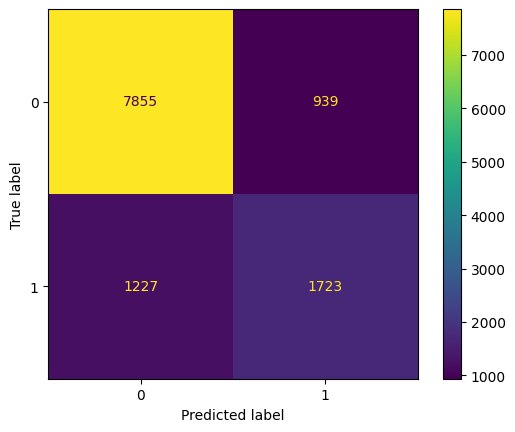

---------------------------

Logistic Regression :

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      8794
           1       0.56      0.81      0.67      2950

    accuracy                           0.79     11744
   macro avg       0.74      0.80      0.76     11744
weighted avg       0.84      0.79      0.80     11744



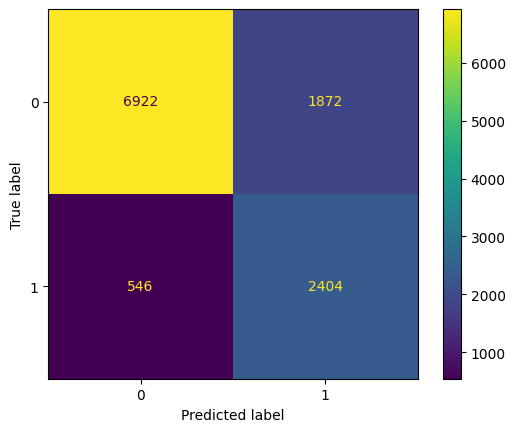

---------------------------

KNeighbors :

              precision    recall  f1-score   support

           0       0.92      0.64      0.76      8794
           1       0.44      0.84      0.57      2950

    accuracy                           0.69     11744
   macro avg       0.68      0.74      0.67     11744
weighted avg       0.80      0.69      0.71     11744



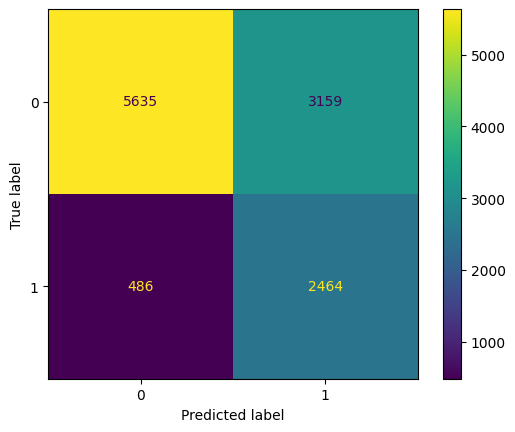

---------------------------



In [ ]:
#Start a dataframe to contain all the relevant information to compare models
model_scores = pd.DataFrame(columns = ['Model', 'Accuracy Score', 'Precision Score',
                                       'Recall Score', 'F1 Score', 'ROC', 'Best Parameters',
                                       'Execution Time'])

#For loop to display baslines of all models contained in 'models' and adds data to 'model_scores'
for model in range(len(models)):
    stats = []
    tic = time.time()
    current_model = models[model][1]
    smote_model = smote_pipe(preprocessor, smote, current_model)
    smote_model.fit(X_train, y_train)
    y_pred = smote_model.predict(X_test)
    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    best_param = 'N/A'
    toc = time.time()
    time_taken = round(toc - tic, 2)
    stats.extend([models[model][0], accuracy, precision, recall, f1, roc, best_param, time_taken])
    model_scores.loc[len(model_scores.index)] = stats

    print(models[model][0], ':\n')
    print(classification_report(y_test, y_pred))
    cm
    plt.show();
    print('---------------------------\n')

In [ ]:
#Display baseline scores to determine best models to tune
model_scores

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC,Best Parameters,Execution Time
0,Random Forest,0.815565,0.647258,0.584068,0.614041,0.738645,N/A,16.70
1,Logistic Regression,0.794108,0.562208,0.814915,0.665375,0.801021,N/A,5.08
2,KNeighbors,0.689629,0.438200,0.835254,0.574828,0.738016,N/A,13.83


* Random Forest and Logistic Regression had the highest accuracy and precision score.
* However, KNeighbors had the highest Recall (0.835).
* KNeighbors also had the lowest accuracy.


##Model tuning

In [ ]:

#Functionize model creation and data storage. ROC_AUC maximized
def model_tuning(model_name, model_used, params):
    stats = []
    tic = time.time()
    smote_model = smote_pipe(preprocessor, smote, model_used)
    grid = GridSearchCV(estimator = smote_model, param_grid = params, scoring = 'roc_auc', cv = 10)
    #gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
    grid.fit(X_train, y_train)
    best_param = grid.best_params_
    best_model = grid.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    toc = time.time()
    time_taken = round(toc - tic, 2)
    stats.extend([model_name, accuracy, precision, recall, f1, roc, best_param, time_taken])
    model_scores.loc[len(model_scores.index)] = stats

    print(model_name, ':\n')
    print(classification_report(y_test, y_pred))
    cm
    plt.show();

In [ ]:

## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, classes=None,
                            figsize=(20,5), name='Classification Model',
                            average='binary', zero_division=0):
  """Takes as required arguments: a model, traing features, training labels,
  testing feature, testing labels
  Prints a classification reports and confusion matrics for each data set
  returns a dataframe of metrics

  Optional arguments:
    cmap: colormap
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure
    name: give your model a name
    average: how to aggregate scores for multiclass problems
    zero_division: what should the result of divide by zero be?"""

  # Gather model predictions
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)

  # Display classification report and confusion matrices
  print('======Train Set Metrics======')
  print(metrics.classification_report(y_train, train_preds,
                                      zero_division=0,
                                      target_names=classes))

  print('======Test Set Metrics======')
  print(metrics.classification_report(y_test, test_preds,
                                      zero_division=0,
                                      target_names=classes))

  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  ConfusionMatrixDisplay.from_predictions(y_train, train_preds, cmap=cmap,
                                display_labels=classes,
                                normalize=normalize, ax=axes[0])
  axes[0].set_title('Train Confusion Matrix')

  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap=cmap,
                              display_labels=classes,
                              normalize=normalize, ax=axes[1])
  axes[1].set_title('Test Confusion Matrix')
  plt.show()

  # If there are more than 2 classes and an average has not been set,
  # set average to 'macro'
  if average == 'binary' and y_train.nunique() > 2:
    average = 'macro'

  # Create a dataframe of scores to return
  scores = pd.DataFrame()

  # Training

  scores.loc[name, 'Train Accuracy'] = accuracy_score(y_train, train_preds)
  scores.loc[name, 'Train Recall'] = recall_score(y_train, train_preds,
                                                           average=average,
                                                       zero_division=zero_division)
  scores.loc[name, 'Train Precision'] = precision_score(y_train, train_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Train F1-Score'] = f1_score(y_train, train_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  # Testing
  scores.loc[name, 'Test Accuracy'] = accuracy_score(y_test, test_preds)
  scores.loc[name, 'Test Recall'] = recall_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test Precision'] = precision_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test F1-Score'] = f1_score(y_test, test_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  return scores


Logistic Regression Tuned :

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      8794
           1       0.56      0.82      0.67      2950

    accuracy                           0.80     11744
   macro avg       0.75      0.80      0.76     11744
weighted avg       0.84      0.80      0.81     11744



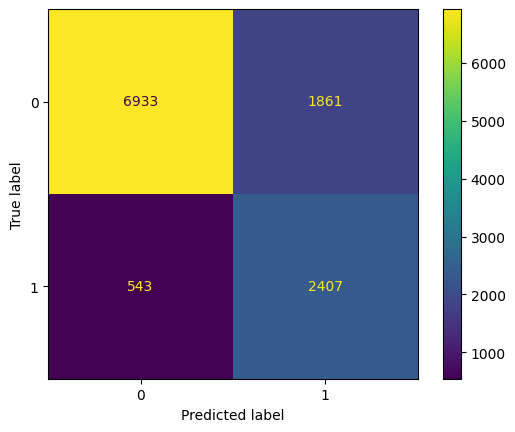

In [ ]:
#Logistic regression with Gridsearch parameters
model_tuning('Logistic Regression Tuned', LogisticRegression(),
                            {'logisticregression__C': [.001, .01,.025, .1, .5, 1, 10],
                            'logisticregression__penalty': ['l1', 'l2', 'none'],
                            'logisticregression__random_state': [42]});

In [ ]:
# Instantiate default random forest model
rf = RandomForestClassifier(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [ ]:

# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8eea1d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8ee9ae0>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     26599
           1       0.93      0.91      0.92      8631

    accuracy                           0.96     35230
   macro avg       0.95      0.95      0.95     35230
weighted avg       0.96      0.96      0.96     35230

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      8794
           1       0.67      0.55      0.60      2950

    accuracy                           0.82     11744
   macro avg       0.76      0.73      0.74     11744
weighted avg       0.81      0.82      0.81     11744



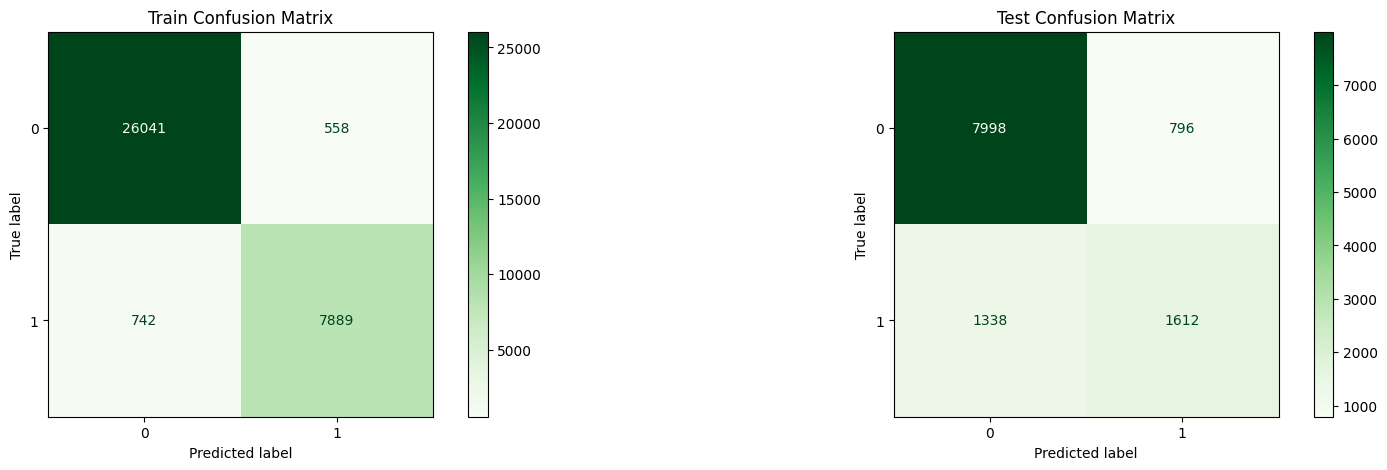

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Random Forest Classification,0.9631,0.914031,0.933941,0.923879,0.81829,0.546441,0.669435,0.601717


In [ ]:
# Use custom function to evaluate default model
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test,name='Random Forest Classification')


In [ ]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8eea1d0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8ee9ae0>)],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier(random_

In [ ]:
# Define param grid with options to try
params = {'randomforestclassifier__max_depth': [None,10,15,20],
          'randomforestclassifier__n_estimators':[10,100,150,200],
          'randomforestclassifier__min_samples_leaf':[2,3,4],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],}

In [ ]:

# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8eea1d0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder...
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 15,
                                                               20],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'randomforestclassifier__min_samples_leaf': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [10, 100, 150,
                                                                  200],
                         'randomforestclassifier__oob_score': [True, False]},
             verbose=1)

In [ ]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__oob_score': True}

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     26599
           1       0.77      0.57      0.66      8631

    accuracy                           0.85     35230
   macro avg       0.82      0.76      0.78     35230
weighted avg       0.85      0.85      0.84     35230

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      8794
           1       0.73      0.53      0.61      2950

    accuracy                           0.83     11744
   macro avg       0.79      0.73      0.75     11744
weighted avg       0.82      0.83      0.82     11744



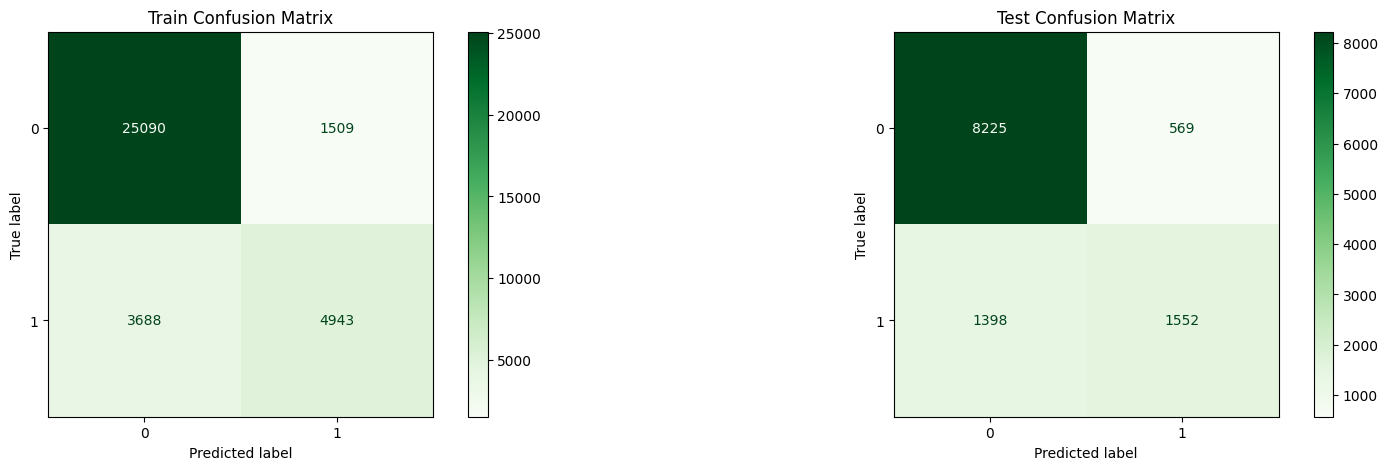

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Random Forest Tuned,0.852484,0.572703,0.766119,0.65544,0.83251,0.526102,0.73173,0.612108


In [ ]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_classification(best_rf, X_train, y_train, X_test, y_test,name='Random Forest Tuned')

In [ ]:
## Create an instance of the model
kn = KNeighborsClassifier()

## Create a model pipeline
kn_pipe = make_pipeline(preprocessor, kn)

## Fit the model
kn_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8eea1d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8ee9ae0>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     26599
           1       0.75      0.68      0.71      8631

    accuracy                           0.87     35230
   macro avg       0.82      0.80      0.81     35230
weighted avg       0.86      0.87      0.86     35230

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      8794
           1       0.63      0.54      0.58      2950

    accuracy                           0.81     11744
   macro avg       0.74      0.72      0.73     11744
weighted avg       0.80      0.81      0.80     11744



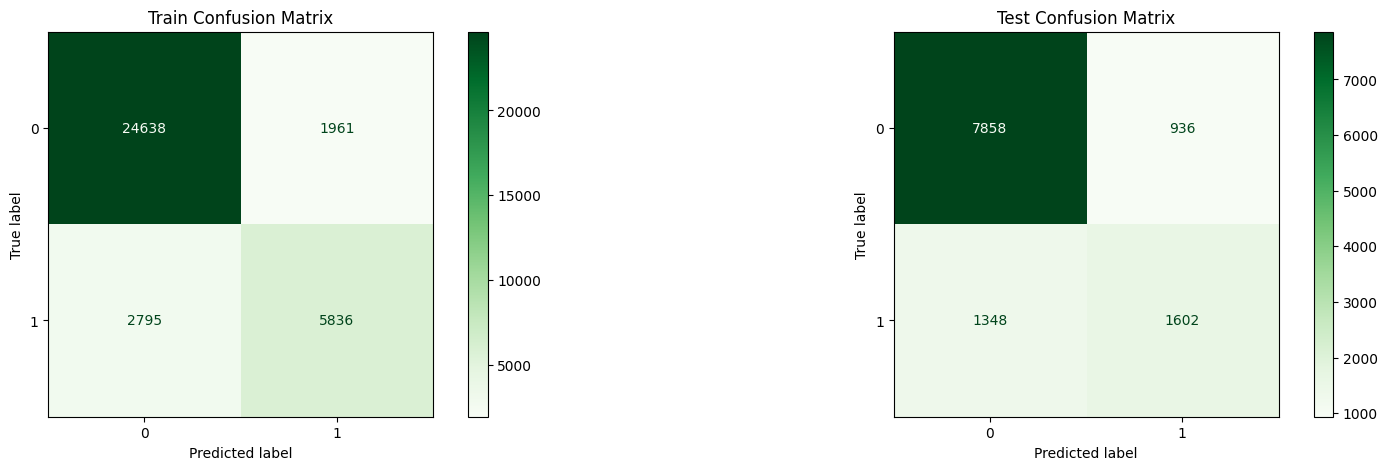

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
KN Model,0.865001,0.676167,0.748493,0.710494,0.805518,0.543051,0.631206,0.583819


In [ ]:
evaluate_classification(kn_pipe, X_train, y_train, X_test, y_test,
                             figsize=(20,5), name="KN Model")

##Tune the Model

In [ ]:
kn_params_gs = {"kneighborsclassifier__n_neighbors": list(range(1,10,2))}, # This block of code created a parameter dictionary for the KN Model for tuning.



In [ ]:
kn_gs = GridSearchCV(kn_pipe, kn_params_gs)


In [ ]:
kn_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8eea1d0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe8ee9ae0>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid=({'kneighborsclassifier__n_neighbors': [1, 3, 5, 7,
                                                                9]},))

In [ ]:

kn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 9}

In [ ]:
# Create a model pipeline
kn_tuned_pipe = kn_gs.best_estimator_

## Fit the model
kn_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe726db10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e9fe726f340>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     26599
           1       0.73      0.63      0.68      8631

    accuracy                           0.85     35230
   macro avg       0.81      0.78      0.79     35230
weighted avg       0.85      0.85      0.85     35230

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      8794
           1       0.66      0.55      0.60      2950

    accuracy                           0.82     11744
   macro avg       0.76      0.73      0.74     11744
weighted avg       0.81      0.82      0.81     11744



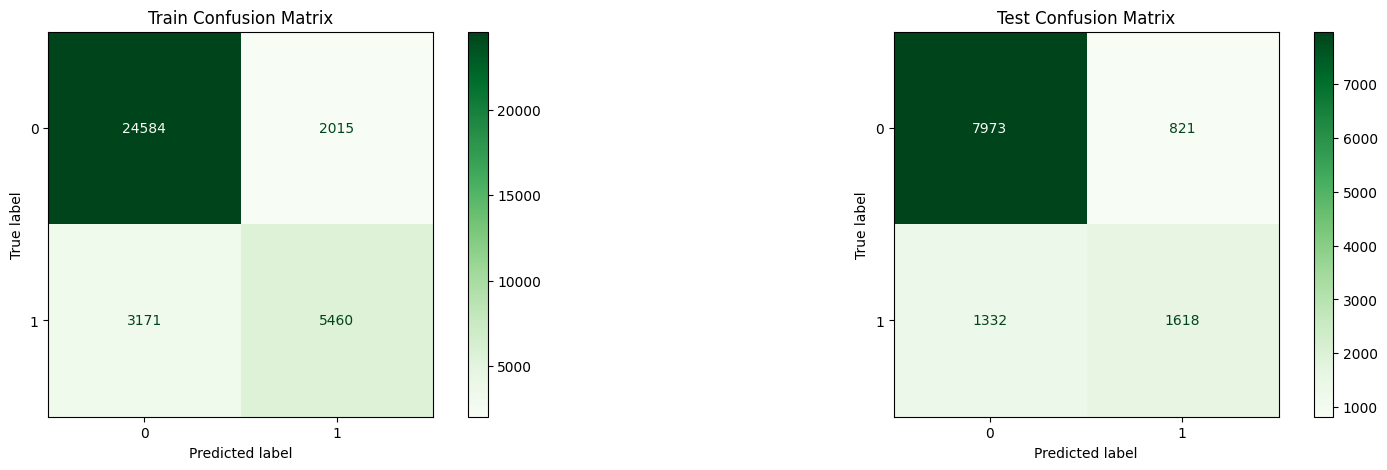

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
KN Tuned Model,0.852796,0.632603,0.730435,0.678008,0.816672,0.548475,0.663387,0.600482


In [ ]:
evaluate_classification(kn_tuned_pipe, X_train, y_train, X_test, y_test,
                            figsize=(20,5), name="KN Tuned Model",
                            average="binary", zero_division=0)

##PCA

In [ ]:
#Grab best parameters for tuned models to be used for PCA
model_scores[['Model', 'Best Parameters']]

,Model,Best Parameters
0,Random Forest,N/A
1,Logistic Regression,N/A
2,KNeighbors,N/A
3,Logistic Regression Tuned,"{'logisticregression__C': 0.5, 'logisticregres..."


In [ ]:
#Instantiate PCA
pca = PCA(n_components = .95)

In [ ]:
#Similar function as model_tuning with additional PCA steps. ROC_AUC maximized
def model_pca_tuning(model_name, model_used, params):
    stats = []
    tic = time.time()
    smote_model = smote_pipe(preprocessor, pca, smote, model_used)
    grid = GridSearchCV(estimator = smote_model, param_grid = params, scoring = 'roc_auc', cv = 10)
    grid.fit(X_train, y_train)
    best_param = grid.best_params_
    best_model = grid.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    toc = time.time()
    time_taken = round(toc - tic, 2)
    stats.extend([model_name, accuracy, precision, recall, f1, roc, best_param, time_taken])
    model_scores.loc[len(model_scores.index)] = stats

    print(model_name, ':\n')
    print(classification_report(y_test, y_pred))
    cm
    plt.show();

Logistic Regression PCA Tuned :

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      8794
           1       0.56      0.82      0.67      2950

    accuracy                           0.79     11744
   macro avg       0.75      0.80      0.76     11744
weighted avg       0.84      0.79      0.80     11744



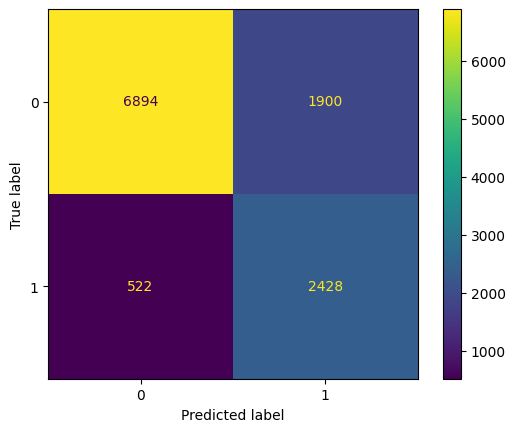

In [ ]:
#PCA model Logistic Regression
model_pca_tuning('Logistic Regression PCA Tuned', LogisticRegression(),
                                        {'logisticregression__C': [.001, .01,.025, .1, .5, 1, 10],
                                        'logisticregression__penalty': ['l1', 'l2', 'none'],
                                        'logisticregression__random_state': [42]});

Random Forest PCA Tuned :

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      8794
           1       0.56      0.81      0.66      2950

    accuracy                           0.79     11744
   macro avg       0.74      0.80      0.75     11744
weighted avg       0.83      0.79      0.80     11744



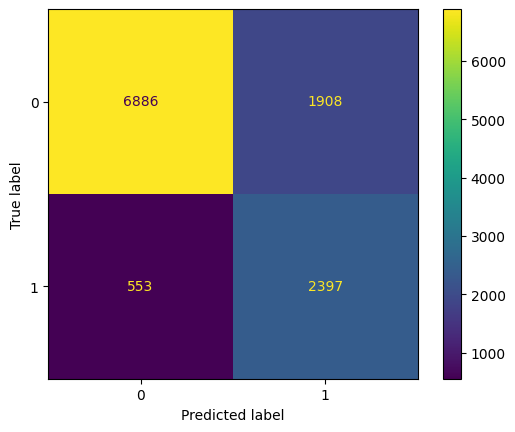

In [ ]:
#PCA model using Classification
model_pca_tuning('Random Forest PCA Tuned', RandomForestClassifier(),
                                        {'randomforestclassifier__max_depth': ['none',10,15,20],
                                        'randomforestclassifier__min_samples_leaf':[3],
                                         'randomforestclassifier__n_estimators': [200],
                                         'randomforestclassifier__oob_score': [True]})

KN Tuned :

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      8794
           1       0.49      0.79      0.61      2950

    accuracy                           0.74     11744
   macro avg       0.70      0.76      0.71     11744
weighted avg       0.81      0.74      0.76     11744



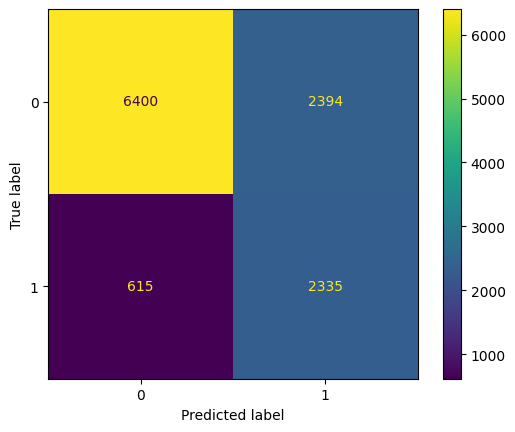

In [ ]:
#PCA model KNN Classification
model_pca_tuning('KN Tuned', KNeighborsClassifier(),
                                        {"kneighborsclassifier__n_neighbors": [1,10,2]})

In [ ]:
#Display all model scores
model_scores.set_index('Model')
model_scores

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC,Best Parameters,Execution Time
0,Random Forest,0.815565,0.647258,0.584068,0.614041,0.738645,N/A,16.70
1,Logistic Regression,0.794108,0.562208,0.814915,0.665375,0.801021,N/A,5.08
2,KNeighbors,0.689629,0.438200,0.835254,0.574828,0.738016,N/A,13.83
3,Logistic Regression Tuned,0.795300,0.563964,0.815932,0.666944,0.802155,"{'logisticregression__C': 0.5, 'logisticregres...",633.42
4,Logistic Regression PCA Tuned,0.793767,0.560998,0.823051,0.667216,0.803497,"{'logisticregression__C': 0.5, 'logisticregres...",531.10
5,Random Forest PCA Tuned,0.790446,0.556794,0.812542,0.660786,0.797788,"{'randomforestclassifier__max_depth': 10, 'ran...",3511.21
6,KN Tuned,0.743784,0.493762,0.791525,0.608152,0.759647,{'kneighborsclassifier__n_neighbors': 10},121.06


Given the results of the models after running with PCA I think Logistic Regression PCA Tuned performed slighlty better than Random Forest therefore I would use this as my prediction model and suggest to my stakeholder. KNeighbors actually scored lower before using PCA but still lower than both other models.